# EXPLORE PROGRAMMING

In [1]:
from src.make_lti_crn import makeLtiCrn
from src.model import Model
from src.jacobian import Jacobian
from src.subsystem import Subsystem

import numpy as np
import pandas as pd
import random
import sympy as sp
import tellurium as te

# Symbolic Solution of Linear Systems

In [2]:
model_str = makeLtiCrn(num_species=5,
                is_input_boundary=True, 
                num_reaction=10,
                num_products_bounds=(1, 2),
                kinetic_constant_bounds= (0.1, 1),
                stoichiometry_bounds=(1, 3),
                input_species_indices=[1])
print(model_str)

# Random Chemical Reaction Network
# Generated with specified constraints

model random_crn()

  # Species
  species S1_;
  species S2_;
  species S3_;
  species S4_;
  species S5_;

  S3_ -> 2 S5_ + S5_; k2 * S3_
  S4_ -> 2 S5_; k3 * S4_
  S5_ -> 3 S5_ + S5_; k4 * S5_
  S1_ -> 2 S3_; k5 * S1_
  S5_ -> 2 S5_; k6 * S5_
  S1_ -> 2 S4_ + S4_; k7 * S1_
  S4_ -> 2 S5_; k8 * S4_
  S4_ -> 2 S3_ + S5_; k9 * S4_
  S4_ -> 3 S3_; k10 * S4_

  # Rate constants
  k2 = 0.5544
  k3 = 0.8159
  k4 = 0.1997
  k5 = 0.7367
  k6 = 0.5605
  k7 = 0.5804
  k8 = 0.2110
  k9 = 0.2730
  k10 = 0.7928

  # Species initialization
  $S1_ = 1  # Input boundary species
  $S1_ = 1  # Input boundary species
  S2_ = 0
  S3_ = 0
  S4_ = 0
  S5_ = 0


  # Degradation reactions
  S2_ -> ; kd_0 * S2_
  kd_0 = 0.0000
  S3_ -> ; kd_1 * S3_
  kd_1 = 2.6070
  S5_ -> ; kd_3 * S5_
  kd_3 = 5.6646
end


In [3]:
model = Model(model_str.replace("$", ""))
jacobian = Jacobian(model)

species_name = "S1_"
species_idx = model.getSpeciesIndex(species_name)
b_smat = jacobian.b_smat
# Construct the A' matrix and c vector
Ap_smat = jacobian.jacobian_smat.copy()
Ap_smat[species_idx, :] = sp.Matrix.zeros(1, model.num_species)
Ap_smat = Ap_smat[:, [i for i in range(model.num_species) if i != species_idx]]
b_smat[species_idx] = 0
c_smat = jacobian.jacobian_smat[:, species_idx]
c_smat = sp.Matrix.zeros(model.num_species, 1) - c_smat
# Solve for steady-state
x_solns = [sp.Symbol(f"x{n}_ss") for n in range(2, model.num_species+1)]
#x2_ss,x3_ss, x4_ss = sp.symbols("x2_ss,x3_ss, x4_ss")
#x_ss = sp.Matrix([x2_ss, x3_ss, x4_ss])
x_ss = sp.Matrix(x_solns)
solution = sp.solve(Ap_smat * x_ss + b_smat - c_smat, x_solns)
solution

{x2_ss: 0.0,
 x3_ss: (2.0*k10*k5 + 9.0*k10*k7 + 2.0*k3*k5 + 2.0*k5*k8 + 2.0*k5*k9 + 6.0*k7*k9)/(k10*k2 + k10*kd_1 + k2*k3 + k2*k8 + k2*k9 + k3*kd_1 + k8*kd_1 + k9*kd_1),
 x4_ss: 3.0*k7/(k10 + k3 + k8 + k9),
 x5_ss: (-6.0*k10*k2*k5 - 27.0*k10*k2*k7 - 6.0*k2*k3*k5 - 6.0*k2*k3*k7 - 6.0*k2*k5*k8 - 6.0*k2*k5*k9 - 6.0*k2*k7*k8 - 21.0*k2*k7*k9 - 6.0*k3*k7*kd_1 - 6.0*k7*k8*kd_1 - 3.0*k7*k9*kd_1)/(3.0*k10*k2*k4 + k10*k2*k6 - k10*k2*kd_3 + 3.0*k10*k4*kd_1 + k10*k6*kd_1 - k10*kd_1*kd_3 + 3.0*k2*k3*k4 + k2*k3*k6 - k2*k3*kd_3 + 3.0*k2*k4*k8 + 3.0*k2*k4*k9 + k2*k6*k8 + k2*k6*k9 - k2*k8*kd_3 - k2*k9*kd_3 + 3.0*k3*k4*kd_1 + k3*k6*kd_1 - k3*kd_1*kd_3 + 3.0*k4*k8*kd_1 + 3.0*k4*k9*kd_1 + k6*k8*kd_1 + k6*k9*kd_1 - k8*kd_1*kd_3 - k9*kd_1*kd_3)}

In [4]:
jacobian.jacobian_smat

Matrix([
[-1.0*k5 - 1.0*k7,         0,                  0,                                   0,                          0],
[               0, -1.0*kd_0,                  0,                                   0,                          0],
[          2.0*k5,         0, -1.0*k2 - 1.0*kd_1,                    3.0*k10 + 2.0*k9,                          0],
[          3.0*k7,         0,                  0, -1.0*k10 - 1.0*k3 - 1.0*k8 - 1.0*k9,                          0],
[               0,         0,             3.0*k2,            2.0*k3 + 2.0*k8 + 1.0*k9, 3.0*k4 + 1.0*k6 - 1.0*kd_3]])

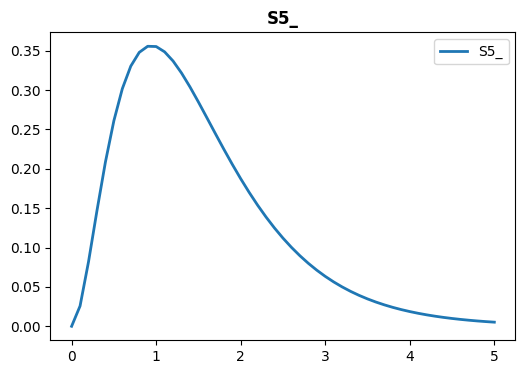

In [5]:
model.roadrunner.reset()
species_name = f"S{list(solution.keys())[-1].name[1]}_"
model.roadrunner.simulate(selections=["time", species_name])
model.roadrunner.plot(title=species_name)

# Jacobian for Paper example

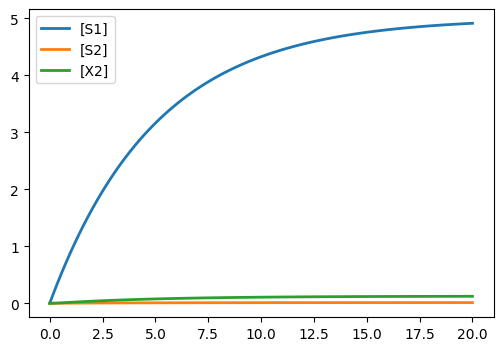

In [6]:
MODEL = """
J1: X0 -> S1; k1*X0
J2: S1 -> ; k1d*S1
J3: S1 -> S2; k2f*S1
J4: S2 -> S1; k2b*S2
J5: S2 -> X2; k3*S2
J6: X2 -> ; k4*X2
k1=1; k2=2; k3=40; k4=4; k1d=0.1; k2f=0.1; k2b=0.1
$X0=1; S1=0; S2=0; S3=3; S4=0;
"""
rr = te.loada(MODEL)
rr.simulate(0, 20, 100)
rr.plot()

In [7]:
model = Model(MODEL.replace("$",""), species_names=["X0", "S1", "S2", "X2"])
jacobian = Jacobian(model)
jacobian.jacobian_smat

Matrix([
[-1.0*k1,                  0,                 0,       0],
[ 1.0*k1, -1.0*k1d - 1.0*k2f,           1.0*k2b,       0],
[      0,            1.0*k2f, -1.0*k2b - 1.0*k3,       0],
[      0,                  0,            1.0*k3, -1.0*k4]])

In [8]:
subsystem = Subsystem(MODEL.replace("$", ""))
result_dct = subsystem.calculateSymbolicStepResponse(input_name="X0")
for k, v in result_dct.items():
    print(f"{k}: {v.__str__()}")

S1: (k1*k2b + k1*k3)/(k1d*k2b + k1d*k3 + k2f*k3)
S2: k1*k2f/(k1d*k2b + k1d*k3 + k2f*k3)
X2: k1*k2f*k3/(k1d*k2b*k4 + k1d*k3*k4 + k2f*k3*k4)
X0: 1


In [9]:
result_dct["X0"]

1

In [10]:
result_dct["S1"]

(k1*k2b + k1*k3)/(k1d*k2b + k1d*k3 + k2f*k3)

In [11]:
result_dct["S2"]

k1*k2f/(k1d*k2b + k1d*k3 + k2f*k3)

In [12]:
result_dct["X2"]

k1*k2f*k3/(k1d*k2b*k4 + k1d*k3*k4 + k2f*k3*k4)

# Branching System

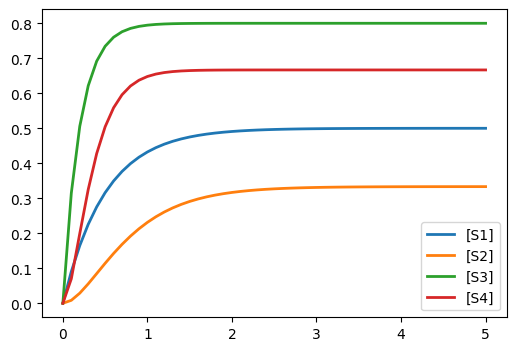

In [13]:
MODEL = """
J1: X0 -> S1; k1*X0
J2: S1 -> S2; k2*S1
J3: S2 -> ; k3*S2
J4: X0 -> S3; k4*X0
J5: S3 -> S4; k5*S3
J6: S4 -> ; k6*S4
$X0 = 1;
S1 = 0; S2=0; S3=0; S4=0;
k1=1; k2=2; k3=3; k4=4; k5=5; k6=6
"""
rr = te.loada(MODEL)
rr.simulate()
rr.plot()

In [14]:
subsystem1 = Subsystem(MODEL.replace("$", ""), reaction_names=["J1", "J2", "J3"], species_names=["X0", "S1", "S2"])
subsystem1.calculateSymbolicStepResponse(input_name="X0")

{'S1': k1/k2, 'S2': k1/k3, 'X0': 1}

In [15]:
subsystem2 = Subsystem(MODEL.replace("$", ""), reaction_names=["J4", "J5", "J6"], species_names=["X0", "S3", "S4"])
subsystem2.calculateSymbolicStepResponse(input_name="X0")

{'S3': k4/k5, 'S4': k4/k6, 'X0': 1}

In [16]:
subsystem3 = Subsystem(MODEL.replace("$", ""), reaction_names=["J1", "J2", "J3","J4", "J5", "J6"],
                       species_names=["X0", "S3", "S4", "S1", "S2"])
subsystem3.calculateSymbolicStepResponse(input_name="X0")

{'S1': k1/k2, 'S2': k1/k3, 'S3': k4/k5, 'S4': k4/k6, 'X0': 1}

In [17]:
model1_str = makeLtiCrn(num_species=5,
                is_input_boundary=True, 
                num_reaction=10,
                num_products_bounds=(1, 2),
                kinetic_constant_bounds= (0.1, 1),
                stoichiometry_bounds=(1, 3),
                input_species_indices=[1])
model2_str = makeLtiCrn(num_species=5,
                is_input_boundary=True, 
                num_reaction=10,
                num_products_bounds=(1, 2),
                kinetic_constant_bounds= (0.1, 1),
                stoichiometry_bounds=(1, 3),
                starting_species_index=10,
                input_species_indices=[1])
model2_str = model2_str.replace("S", "SS").replace(" k", " kk")
model2_str = model2_str.replace("SS1_", "S1_")
print(model1_str)
print(model2_str)

# Random Chemical Reaction Network
# Generated with specified constraints

model random_crn()

  # Species
  species S1_;
  species S2_;
  species S3_;
  species S4_;
  species S5_;

  S3_ -> 3 S4_; k2 * S3_
  S1_ -> S4_ + S3_; k3 * S1_
  S2_ -> S3_; k4 * S2_
  S1_ -> 2 S4_ + 2 S3_; k5 * S1_
  S3_ -> S4_; k6 * S3_
  S2_ -> S5_; k7 * S2_
  S3_ -> 3 S4_ + 3 S3_; k8 * S3_
  S1_ -> 2 S4_; k9 * S1_
  S3_ -> S4_ + 2 S4_; k10 * S3_

  # Rate constants
  k2 = 0.9219
  k3 = 0.7475
  k4 = 0.1769
  k5 = 0.6048
  k6 = 0.2259
  k7 = 0.8976
  k8 = 0.4354
  k9 = 0.9116
  k10 = 0.3907

  # Species initialization
  $S1_ = 1  # Input boundary species
  $S1_ = 1  # Input boundary species
  S2_ = 0
  S3_ = 0
  S4_ = 0
  S5_ = 0


  # Degradation reactions
  S4_ -> ; kd_2 * S4_
  kd_2 = 6.0169
  S5_ -> ; kd_3 * S5_
  kd_3 = 0.9874
end
# Random Chemical Reaction Network
# Generated with specified constraints

model random_crn()

  # SSpecies
  species SS10_;
  species SS11_;
  species SS12_;
  species SS13_

In [ ]:
model_str = 

In [18]:
subsystem1 = Subsystem(model1_str.replace("$", ""))
subsystem2 = Subsystem(model2_str.replace("$", ""))
subsystem = subsystem1.union(subsystem2)

ValueError: Cannot take union of subsystems with different models.